# Description Dataset:
This dataset contains the latest information on car prices in Australia for the year 2023. It covers various brands, models, types, and features of cars sold in the Australian market. It provides useful insights into the trends and factors influencing the car prices in Australia. The dataset includes information such as brand, year, model, car/suv, title, used/new, transmission, engine, drive type, fuel type, fuel consumption, kilometres, colour (exterior/interior), location, cylinders in engine, body type, doors, seats, and price. The dataset has over 16,000 records of car listings from various online platforms in Australia.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv(r"D:\Data Set\Australian Vehicle Prices.csv (1).zip")

In [3]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [4]:
df.shape

(16734, 19)

## data preprocessing

I see that there are some irrelevant columns that might be a problem for us if we keep them in the dataset, so we are dropping them.

In [5]:
df = df.drop(['Location','Title','Model','Car/Suv','ColourExtInt'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   UsedOrNew          16733 non-null  object 
 3   Transmission       16733 non-null  object 
 4   Engine             16733 non-null  object 
 5   DriveType          16733 non-null  object 
 6   FuelType           16733 non-null  object 
 7   FuelConsumption    16733 non-null  object 
 8   Kilometres         16733 non-null  object 
 9   CylindersinEngine  16733 non-null  object 
 10  BodyType           16452 non-null  object 
 11  Doors              15130 non-null  object 
 12  Seats              15029 non-null  object 
 13  Price              16731 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.8+ MB


In [7]:
df.isna().sum()

Brand                   1
Year                    1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

Doors, Seats have lot of data missing, so we cannot drop them since it will lose a lot of information from the data. However we drop the null values from any other column.

In [8]:
# Fill Null values With Mode Value
df["Doors"].fillna(value=df["Doors"].mode(),inplace=True)
df["Seats"].fillna(value=df["Seats"].mode(),inplace=True)

In [9]:
# drop Null Values
df.dropna(inplace=True)

Converting values of the columns 'Engine','FuelConsumption','ColourExternal','CylindersinEngine', 'Doors' and 'Seats', so that they can be operable.


In [10]:
df["Engine"]=df["Engine"].str.split().str[-2]
df["FuelConsumption"]=df["FuelConsumption"].str.split().str[0]
df["CylindersinEngine"]=df["CylindersinEngine"].str.split().str[0]
df["Doors"]=df["Doors"].str.split().str[0]
df["Seats"]=df["Seats"].str.split().str[0]

In [11]:
df.isna().sum()

Brand                0
Year                 0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

For the column Engine, we fill in the missing values ​​with the mode obtained from the given data for column Engine.


In [12]:
df['Engine'].fillna(df[~df['Engine'].isnull()]['Engine'].str.strip().astype(float).mode()[0],inplace=True)

Now we convert the data types of the columns - Engine, FuelConsumption, Kilometres, CylindersinEngine, Doors, Seats, Prices and Year  into integer or float as per needed.

In [13]:
df['Engine'] = pd.to_numeric(df['Engine'],errors="coerce")
df['FuelConsumption'] = pd.to_numeric(df['FuelConsumption'],errors="coerce")
df['Kilometres'] = pd.to_numeric(df['Kilometres'],errors="coerce")
df['CylindersinEngine'] = pd.to_numeric(df['CylindersinEngine'],errors="coerce")
df['Doors'] = pd.to_numeric(df['Doors'],errors="coerce")
df['Seats'] = pd.to_numeric(df['Seats'],errors="coerce")
df['Price'] = pd.to_numeric(df['Price'],errors="coerce")
df['Year'] = pd.to_numeric(df['Year'],errors="coerce",downcast="integer")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15028 entries, 0 to 16733
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              15028 non-null  object 
 1   Year               15028 non-null  int16  
 2   UsedOrNew          15028 non-null  object 
 3   Transmission       15028 non-null  object 
 4   Engine             15028 non-null  float64
 5   DriveType          15028 non-null  object 
 6   FuelType           15028 non-null  object 
 7   FuelConsumption    15028 non-null  float64
 8   Kilometres         14481 non-null  float64
 9   CylindersinEngine  15028 non-null  int64  
 10  BodyType           15028 non-null  object 
 11  Doors              15028 non-null  int64  
 12  Seats              15028 non-null  int64  
 13  Price              14993 non-null  float64
dtypes: float64(4), int16(1), int64(3), object(6)
memory usage: 1.6+ MB


In [15]:
df.isna().sum()

Brand                  0
Year                   0
UsedOrNew              0
Transmission           0
Engine                 0
DriveType              0
FuelType               0
FuelConsumption        0
Kilometres           547
CylindersinEngine      0
BodyType               0
Doors                  0
Seats                  0
Price                 35
dtype: int64

FuelConsumption, CylindersinEngine have lot of data missing, so we cannot drop them since it will lose a lot of information from the data. However we drop the null values from any other column.

In [16]:
df.dropna(subset=['Kilometres','Price'],inplace=True)

In [17]:
# Fill Null values in FuelConsumption with mean
# Fill Null values in CylindersinEngine with mode
df["FuelConsumption"].fillna(value=df["FuelConsumption"].mean(),inplace=True)
df["CylindersinEngine"].fillna(value=df["CylindersinEngine"].mode(),inplace=True)

In [18]:
df["Transmission"].unique()

array(['Automatic', 'Manual', '-'], dtype=object)

In [19]:
df["Transmission"].replace('-',df["Transmission"].mode().to_list()[0],inplace=True)

In [20]:
df["DriveType"].unique()

array(['AWD', 'Front', 'Rear', '4WD', 'Other'], dtype=object)

In [21]:
df["DriveType"].replace('Other',df["DriveType"].mode().to_list()[0],inplace=True)

In [22]:
df["FuelType"].unique()

array(['Diesel', 'Premium', 'Unleaded', 'Hybrid', '-', 'Electric', 'LPG',
       'Leaded'], dtype=object)

In [23]:
df["FuelType"].replace('-',value=df["FuelType"].mode().to_list()[0],inplace=True)

In [24]:
df["BodyType"].unique()

array(['SUV', 'Hatchback', 'Coupe', 'Commercial', 'Ute / Tray', 'Sedan',
       'People Mover', 'Convertible', 'Wagon', 'Other'], dtype=object)

In [25]:
df["BodyType"].replace('Other',value=df["BodyType"].mode().to_list()[0],inplace=True)

In [26]:
# we don't have any Null Values
df.isna().sum()

Brand                0
Year                 0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

In [27]:
df.head()

,Brand,Year,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,DEMO,Automatic,2.2,AWD,Diesel,8.7,5595.0,4,SUV,4,7,51990.0
1,MG,2022,USED,Automatic,1.5,Front,Premium,6.7,16.0,4,Hatchback,5,5,19990.0
2,BMW,2022,USED,Automatic,2.0,Rear,Premium,6.6,8472.0,4,Coupe,2,4,108988.0
3,Mercedes-Benz,2011,USED,Automatic,5.5,Rear,Premium,11.0,136517.0,8,Coupe,2,4,32990.0
4,Renault,2022,USED,Automatic,1.3,Front,Unleaded,6.0,1035.0,4,SUV,4,5,34990.0


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,14454.0,2016.185554,4.905432,1978.0,2013.0,2017.0,2020.0,2023.0
Engine,14454.0,2.395295,0.885945,0.0,2.0,2.2,2.8,7.3
FuelConsumption,14454.0,7.738495,2.212841,0.0,6.6,7.6,8.8,27.0
Kilometres,14454.0,100096.712329,78140.372463,1.0,41074.0,85052.0,146705.5,526162.0
CylindersinEngine,14454.0,4.424035,1.103954,0.0,4.0,4.0,4.0,12.0
Doors,14454.0,4.022416,0.671279,2.0,4.0,4.0,4.0,5.0
Seats,14454.0,5.121835,1.087803,2.0,5.0,5.0,5.0,22.0
Price,14454.0,34892.533486,29051.928232,88.0,18990.0,28990.0,42288.0,649880.0


I see that there are zero values ​​in the minimum columns "Engine", "Fuel Consumption" and "Cylinders in Engine", so we fill the zero values ​​with the Mean obtained from the given data of each column.

In [29]:
df["CylindersinEngine"] = df["CylindersinEngine"].mask(df["CylindersinEngine"] ==0.0, np.nan)
df["Engine"] = df["Engine"].mask(df["Engine"] ==0.0, np.nan)
df["FuelConsumption"] = df["FuelConsumption"].mask(df["FuelConsumption"] ==0.0, np.nan)

df["CylindersinEngine"].fillna(df["CylindersinEngine"].mean(),inplace=True)
df["Engine"].fillna(df["Engine"].mean(),inplace=True)
df["FuelConsumption"].fillna(df["FuelConsumption"].mean(),inplace=True)

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,14454.0,2016.185554,4.905432,1978.0,2013.0,2017.0,2020.0,2023.0
Engine,14454.0,2.410136,0.865650,0.7,2.0,2.2,2.8,7.3
FuelConsumption,14454.0,7.868050,1.973330,1.7,6.6,7.6,8.8,27.0
Kilometres,14454.0,100096.712329,78140.372463,1.0,41074.0,85052.0,146705.5,526162.0
CylindersinEngine,14454.0,4.451444,1.047590,2.0,4.0,4.0,4.0,12.0
Doors,14454.0,4.022416,0.671279,2.0,4.0,4.0,4.0,5.0
Seats,14454.0,5.121835,1.087803,2.0,5.0,5.0,5.0,22.0
Price,14454.0,34892.533486,29051.928232,88.0,18990.0,28990.0,42288.0,649880.0


## Exploratory Data Analysis

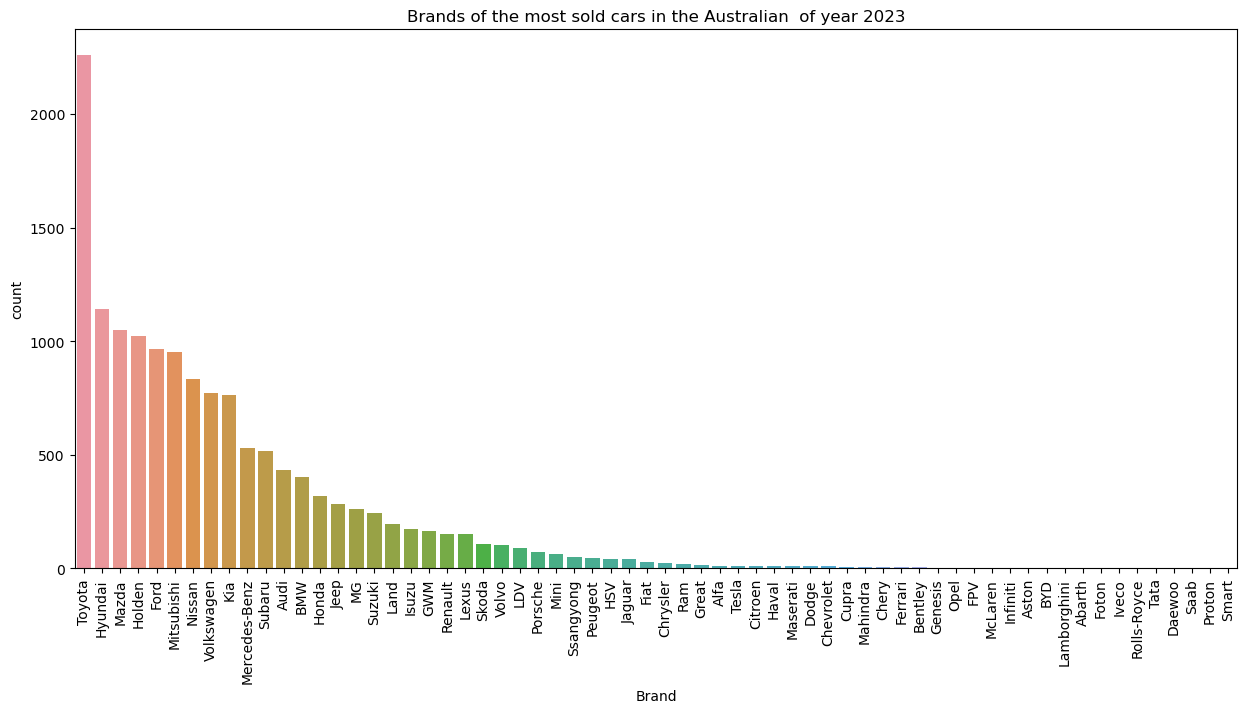

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='Brand',order=df['Brand'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Brands of the most sold cars in the Australian  of year 2023')
plt.show()

In the above countplot we notice the highest sales of car brands is Toyota, Hyundai, Mazda, Holden and Ford

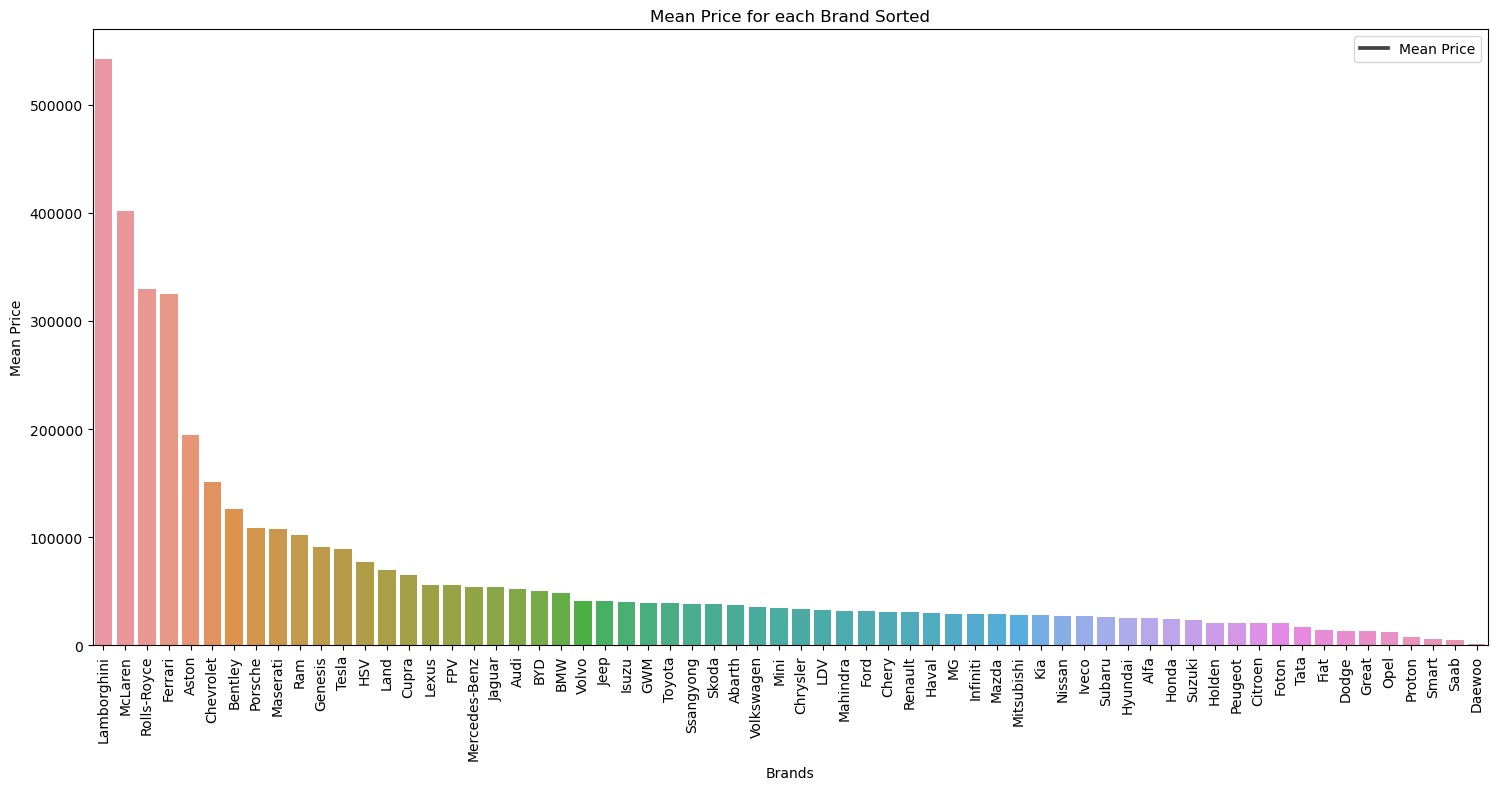

In [32]:
plt.figure(figsize=(18,8))
sns.barplot(data=df,x=df.groupby('Brand')['Price'].mean().sort_values(ascending=False).index,y=df.groupby('Brand')['Price'].mean().sort_values(ascending=False))
plt.title("Mean Price for each Brand Sorted")
plt.xlabel("Brands")
plt.ylabel("Mean Price")
plt.legend(['Mean Price'])
plt.xticks(rotation=90)
plt.show()

In the above barplot we notice The most expensive car brands are Lamborghini, Ferrari, Mclaren, Rolls-Royce and Aston.

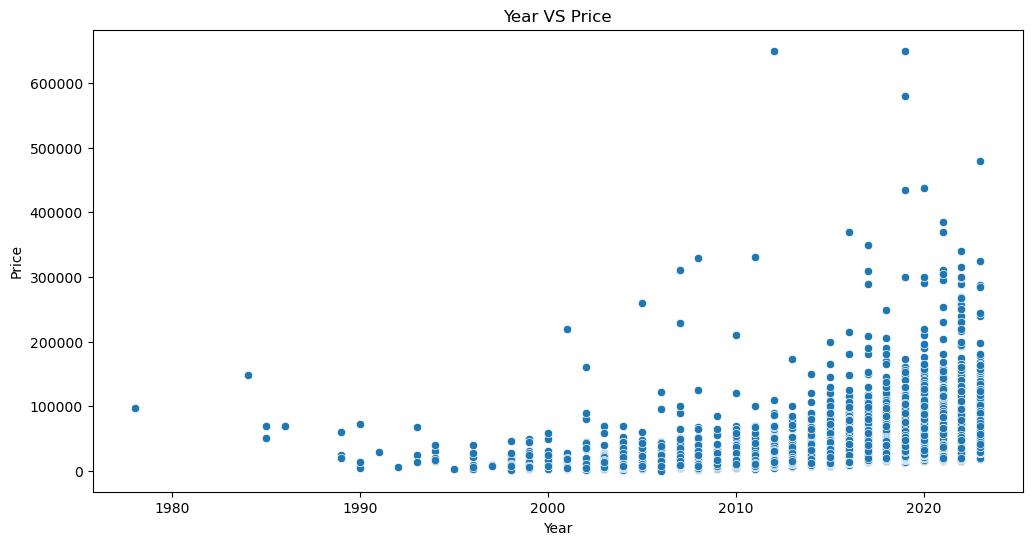

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x="Year",y="Price")
plt.title("Year VS Price")
plt.show()

In the above scatterplot We notice that the price of the car increases the newer the car model is.

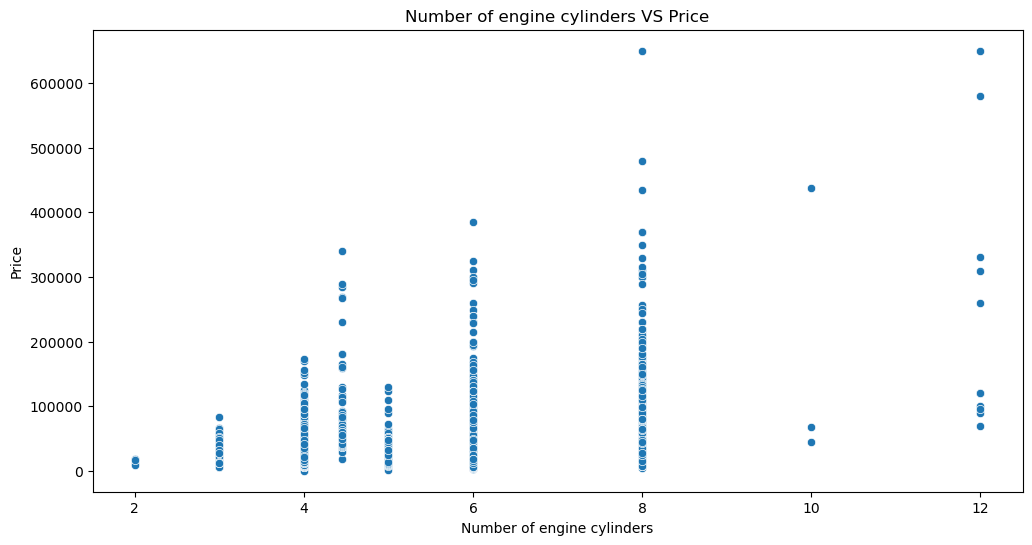

In [34]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x="CylindersinEngine",y="Price")
plt.title("Number of engine cylinders VS Price")
plt.xlabel("Number of engine cylinders")
plt.show()

In the above scatterplot we notice that the price of the car increases with the increase in the number of engine cylinders.

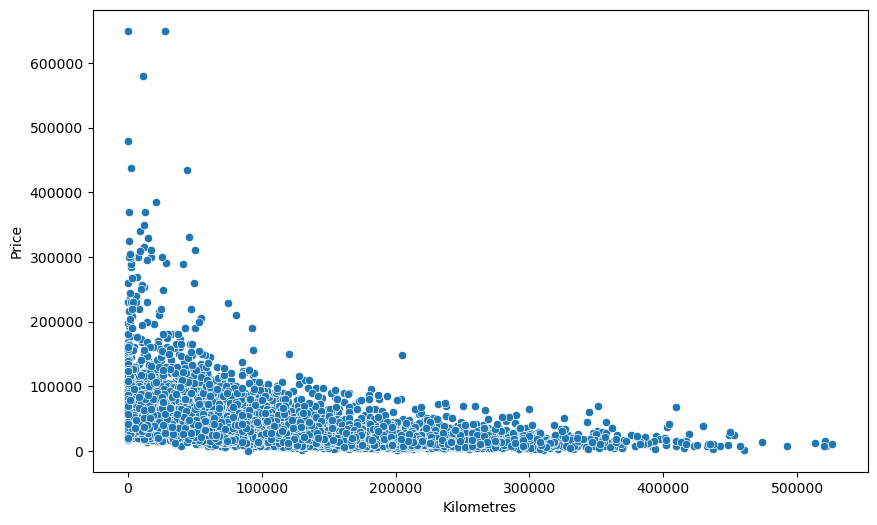

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="Kilometres",y="Price")
plt.show()

In the scatterplot above we notice that the price of the car decreases as the distance traveled by the car increases.

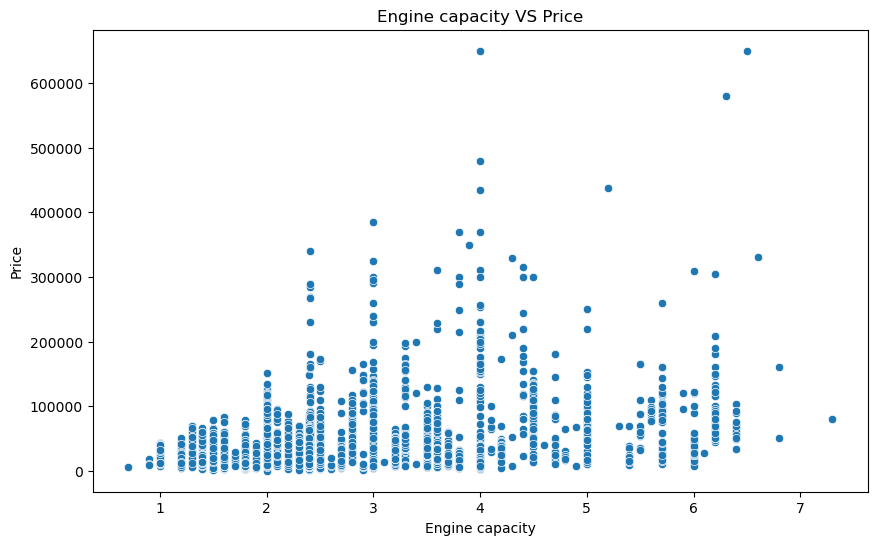

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="Engine",y="Price")
plt.title("Engine capacity VS Price")
plt.xlabel("Engine capacity")
plt.show()

In the above scatterplot we notice that the price of the car increases with the increase in Engine capacity.

In the above graph we notice that most of the cars are used.

Text(0.5, 1.0, 'Types of Body')

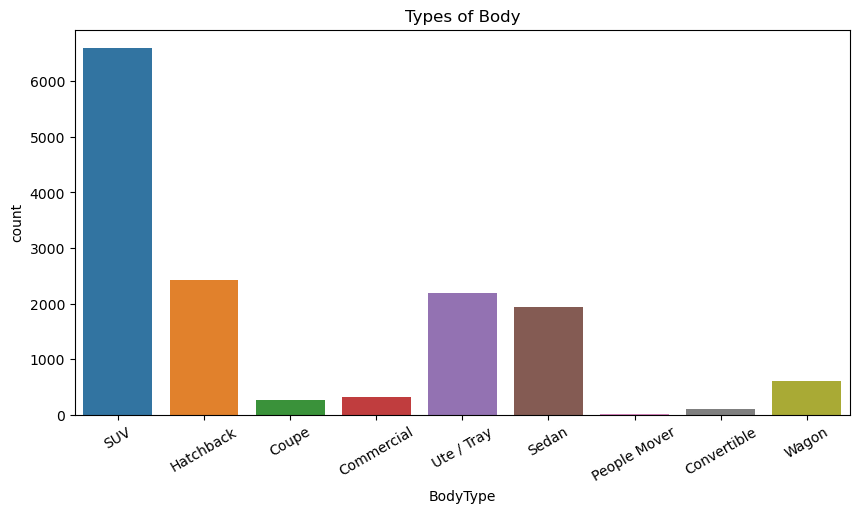

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="BodyType")
plt.xticks(rotation=30)
plt.title('Types of Body')

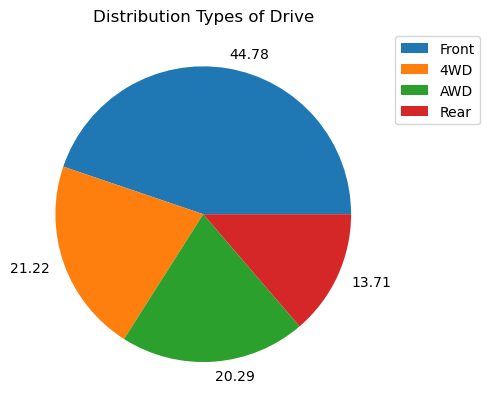

In [38]:
DriveType_freq=df["DriveType"].value_counts()
labels=np.round(DriveType_freq.values/DriveType_freq.values.sum()*100,2)
plt.pie(DriveType_freq,labels=labels)
plt.title('Distribution Types of Drive');
plt.legend(labels=DriveType_freq.index,loc=2,bbox_to_anchor=(1, 1))
plt.xticks(rotation=20)
plt.show()

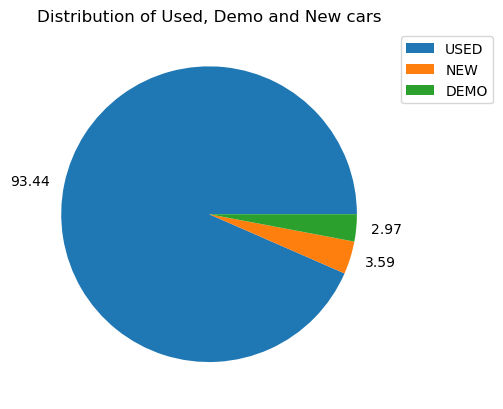

In [39]:
UsedOrNew_freq=df["UsedOrNew"].value_counts()
labels=np.round(UsedOrNew_freq.values/UsedOrNew_freq.values.sum()*100,2)
plt.pie(UsedOrNew_freq,labels=labels)
plt.title('Distribution of Used, Demo and New cars');
plt.legend(labels=UsedOrNew_freq.index,loc=2,bbox_to_anchor=(1, 1))
plt.xticks(rotation=20)
plt.show()

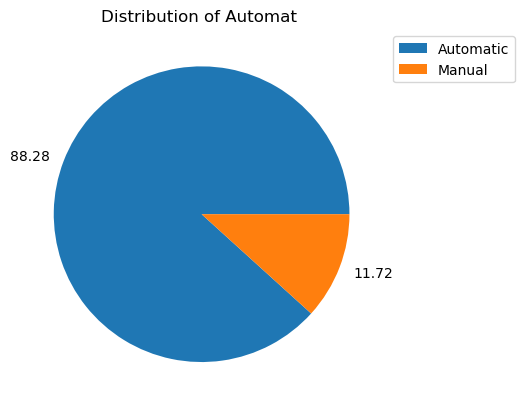

In [40]:
Transmission_freq=df["Transmission"].value_counts()
labels=np.round(Transmission_freq.values/Transmission_freq.values.sum()*100,2)
plt.pie(Transmission_freq,labels=labels)
plt.title('Distribution of Automat ');
plt.legend(labels=Transmission_freq.index,loc=2,bbox_to_anchor=(1, 1))
plt.xticks(rotation=20)
plt.show()

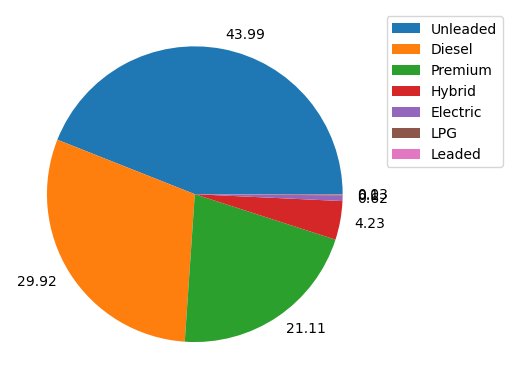

In [41]:
FuelType_freq=df["FuelType"].value_counts()
labels=np.round(FuelType_freq.values/FuelType_freq.values.sum()*100,2)
plt.pie(FuelType_freq,labels=labels)
plt.legend(labels=FuelType_freq.index,loc=2,bbox_to_anchor=(1, 1))
plt.xticks(rotation=20)
plt.show()

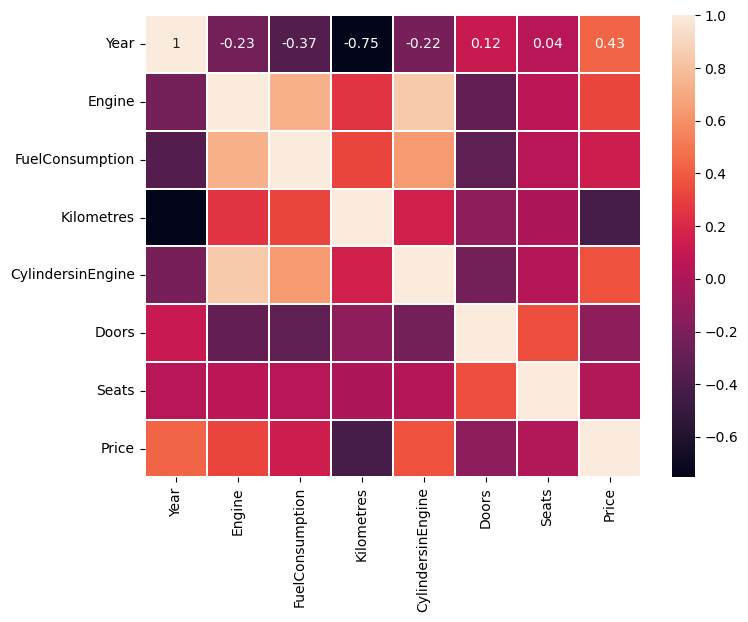

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True, linewidth=.3)
plt.show()

## Data Preparation

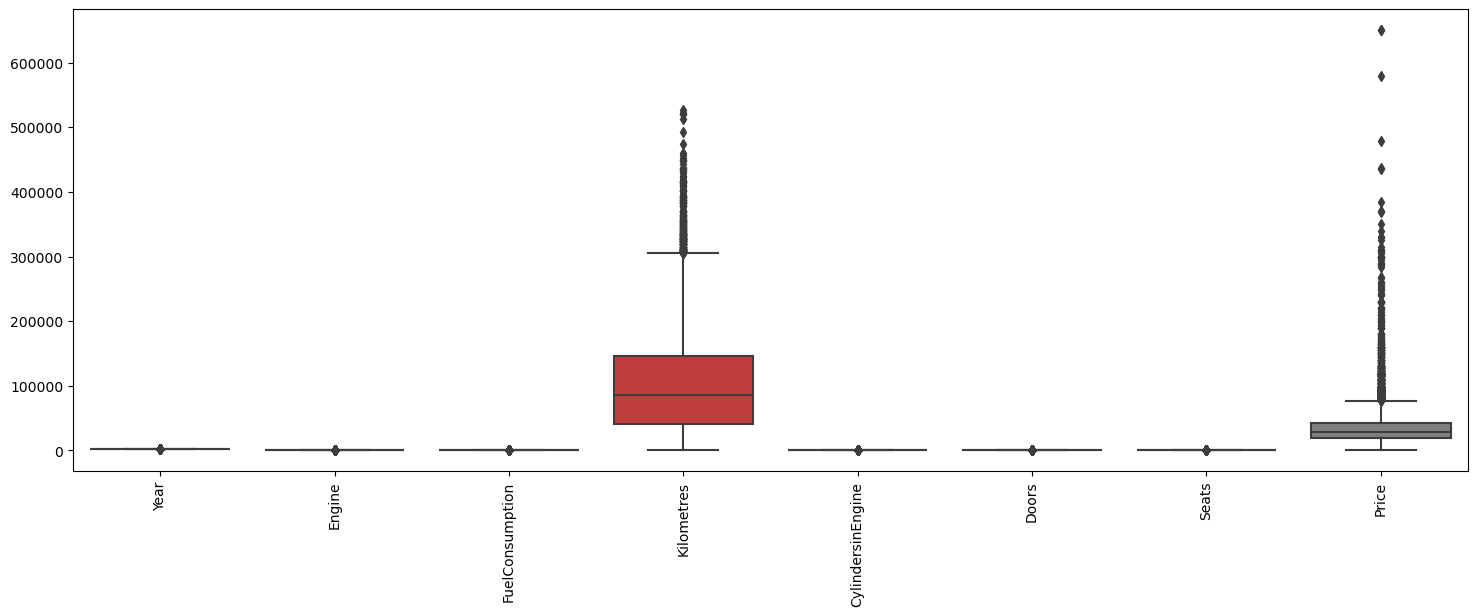

In [43]:
plt.figure(figsize=(18,6))
sns.boxplot(df,)
plt.xticks(rotation=90)
plt.show()

In the boxplot above we notice that the prices of cars and kilometers have a lot of outliers ​​but we will not drop all outliers ​​because in real life we ​​have cars with high prices (overpriced) and the distance traveled by cars may be very large, so I will reduce the number of outliers ​​using the IQR method.

In [44]:
for x in ['Kilometres','Price']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(2*intr_qr)
    print(f'For {x} rows and Max has {df.loc[df[x] > max,x].shape[0] } rows')
    df.loc[df[x] > max,x] = np.nan

df = df.dropna(axis = 0)
df.reset_index(inplace=True)
df.drop(['index'],axis = 1,inplace=True)

For Kilometres rows and Max has 79 rows
For Price rows and Max has 503 rows


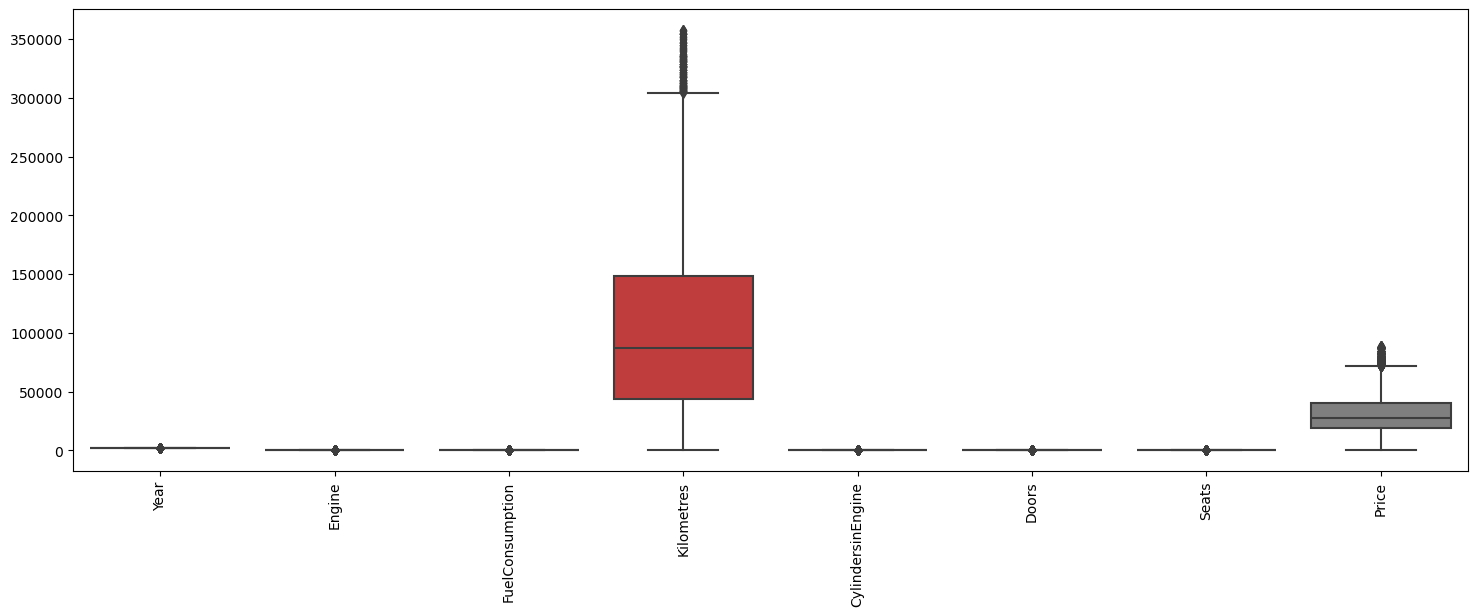

In [45]:
plt.figure(figsize=(18,6))
sns.boxplot(df,whis=1.5)
plt.xticks(rotation=90)
plt.show()

In [46]:
# this is Brands sorted Based on price
brand_ordered=df.groupby('Brand')['Price'].mean().sort_values(ascending=True)
brand_ordered.index

Index(['Daewoo', 'Saab', 'Smart', 'Proton', 'Opel', 'Great', 'Dodge', 'Fiat',
       'Tata', 'Alfa', 'Foton', 'Citroen', 'Peugeot', 'Holden', 'Suzuki',
       'Honda', 'Hyundai', 'Nissan', 'Subaru', 'Iveco', 'Kia', 'Mitsubishi',
       'Infiniti', 'Mazda', 'MG', 'Haval', 'Renault', 'Ford', 'Chery', 'LDV',
       'Mahindra', 'Chrysler', 'Volkswagen', 'Mini', 'Toyota', 'Jeep', 'Volvo',
       'BMW', 'Abarth', 'Skoda', 'Ssangyong', 'Audi', 'GWM', 'Jaguar', 'Isuzu',
       'Mercedes-Benz', 'Lexus', 'Land', 'BYD', 'Bentley', 'HSV', 'Porsche',
       'FPV', 'Cupra', 'Genesis', 'Tesla', 'Maserati', 'Ram'],
      dtype='object', name='Brand')

In [48]:
# labeled encode brands based on mean of price ascending
df = df.replace({
    'Brand': {'Daewoo':1, 'Saab':2, 'Smart':3, 'Proton':4, 'Opel':5, 'Great':6, 'Dodge':7, 'Fiat':8,
       'Tata':9, 'Foton':10, 'Citroen':11, 'Peugeot':12, 'Holden':13, 'Suzuki':14, 'Honda':15,
       'Alfa':16, 'Hyundai':17, 'Subaru':18, 'Iveco':19, 'Nissan':20, 'Kia':21, 'Mitsubishi':22,
       'Infiniti':23, 'Mazda':24, 'MG':25, 'Haval':26, 'Ford':27, 'Renault':28, 'Mahindra':29,
       'Chery':30, 'LDV':31, 'Chrysler':32, 'Mini':33, 'Volkswagen':34, 'Abarth':35, 'Skoda':36,
       'Ssangyong':37, 'Toyota':38, 'GWM':39, 'Isuzu':40, 'Jeep':41, 'Volvo':42, 'BMW':43, 'BYD':44,
       'Audi':45, 'Jaguar':46, 'Mercedes-Benz':47, 'Lexus':48, 'FPV':49, 'Cupra':50, 'Land':51,
       'HSV':52, 'Tesla':53, 'Genesis':54, 'Ram':56, 'Maserati':57, 'Porsche':58, 'Bentley':59,
       'Chevrolet':60, 'Aston':61, 'Ferrari':62, 'Rolls-Royce':63, 'McLaren':64,
       'Lamborghini':65},
})

In [49]:
data=df
df_get_dummies=['UsedOrNew','Transmission','DriveType','FuelType','BodyType']
for col in df_get_dummies :
  onehotcoding=pd.get_dummies(df[col], prefix=col).astype(int)
  df = pd.concat([df, onehotcoding], axis=1)

In [50]:
df.drop(['UsedOrNew','Transmission','DriveType','FuelType','BodyType'],axis=1,inplace=True)

## Model Building

In [51]:
X = df.drop(columns=['Price'])
y = df['Price']

In [52]:
scaler = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25 ,random_state=42)
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [53]:
LinearRegression_model = LinearRegression(fit_intercept=True)
LinearRegression_model.fit(X_scaled,y_train)

y_LR_preds= LinearRegression_model.predict(X_test_scaled)
print('Linear Regression Train Score is : ' , LinearRegression_model.score(X_scaled, y_train))

Linear Regression Train Score is :  0.742706902406564


### RandomForestRegressor

In [54]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100, random_state=33)
RandomForestRegressorModel.fit(X_scaled, y_train)

y_RF_pred = RandomForestRegressorModel.predict(X_test_scaled)
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_scaled, y_train))

Random Forest Regressor Train Score is :  0.9867944864186544


### GradientBoostingRegressor

In [55]:
GBRModel = GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate = 1.5 ,random_state=33)
GBRModel.fit(X_scaled, y_train)

y_GBR_pred = GBRModel.predict(X_test_scaled)
print('GBRModel Train Score is : ' , GBRModel.score(X_scaled, y_train))

GBRModel Train Score is :  0.8783577453743818


## Models Evaluation

In [56]:
LR_r2_score = r2_score(y_test, y_LR_preds)
RF_r2_score = r2_score(y_test, y_RF_pred)
GBR_r2_score = r2_score(y_test, y_GBR_pred)

print('r2_score for Linear Regression is : ', LR_r2_score)
print('r2_score for Random Forest Regressor is : ', RF_r2_score)
print('r2_score for Gradient Boosting Regressor is : ', GBR_r2_score)

r2_score for Linear Regression is :  0.7489751971940393
r2_score for Random Forest Regressor is :  0.9086577375146162
r2_score for Gradient Boosting Regressor is :  0.8464452026962492


Random Forest Regressor model is the best model for this dataset